# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('/Users/rickardramhoj/ironhack_assignments/lab-unsupervised-learning/Wholesale_customers_data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


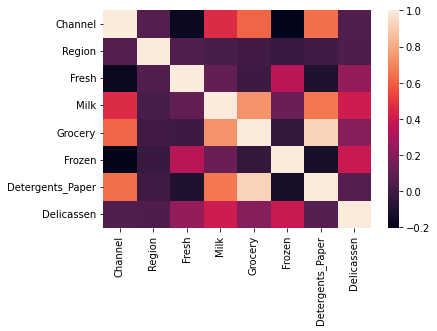

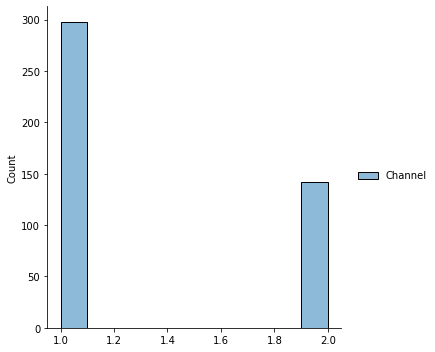

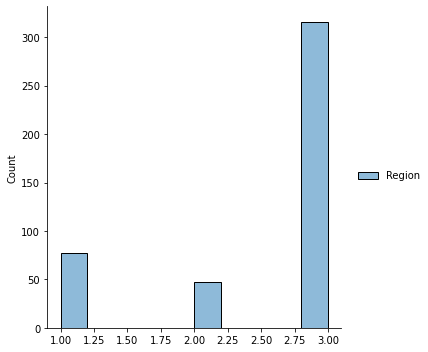

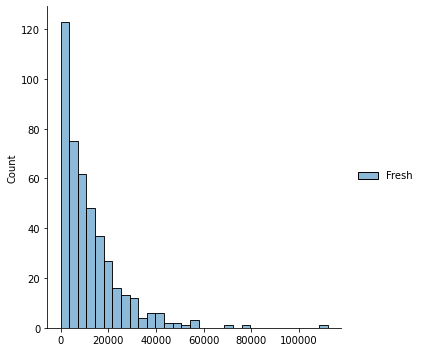

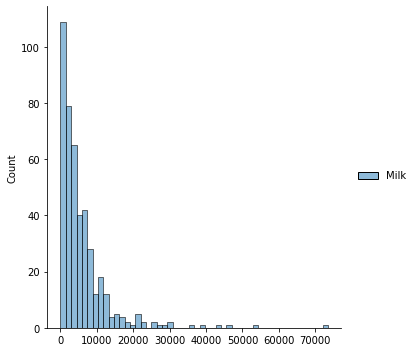

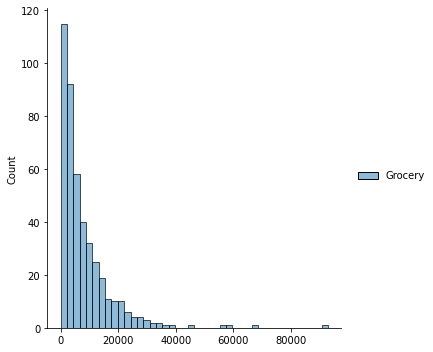

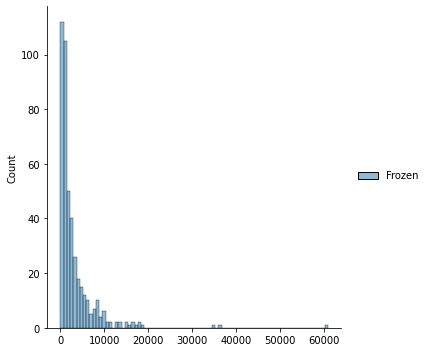

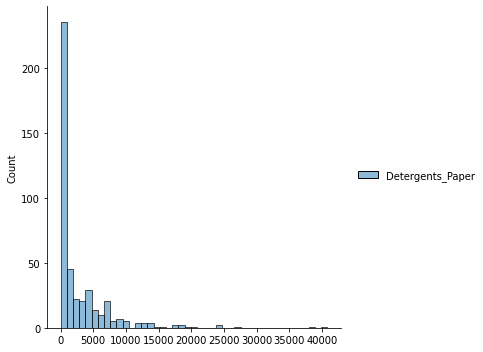

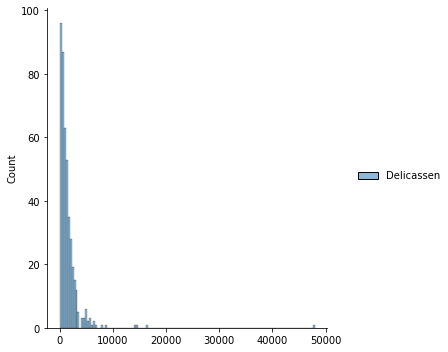

Number of outliers:  26


In [3]:
# Your code here:

# check head
display(customers.head())

# check data types
display(customers.dtypes)

# check for missing data
display(customers.isnull().sum())

# check correlations 
display(customers.corr())

# heatmap
sns.heatmap(customers.corr())
plt.show()

# column-wise distribution
sns.displot(customers[["Channel"]])
plt.show()
sns.displot(customers[["Region"]])
plt.show()
sns.displot(customers[["Fresh"]])
plt.show()
sns.displot(customers[["Milk"]])
plt.show()
sns.displot(customers[["Grocery"]])
plt.show()
sns.displot(customers[["Frozen"]])
plt.show()
sns.displot(customers[["Detergents_Paper"]])
plt.show()
sns.displot(customers[["Delicassen"]])
plt.show()

# check for and remove outliers
z_scores = stats.zscore(customers)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print("Number of outliers: ", len(filtered_entries[filtered_entries == False]))



In [4]:
# Your observations here

""" What does each column mean?
The columns represent the annual spending in monetary units (m.u.) on diverse product categories per region and channel.

Any categorical data to convert?
No

Any missing data to remove?
No

Column collinearity - any high correlations?
There is a 0.92 xorrelation between Detergents_Paper and Grocery. And also high correlation between both of these and Channel.

Descriptive statistics - any outliers to remove?
Yes. 26 rows. 

Column-wise data distribution - is the distribution skewed?
Most are positively skewed. 

"""

' What does each column mean?\nThe columns represent the annual spending in monetary units (m.u.) on diverse product categories per region and channel.\n\nAny categorical data to convert?\nNo\n\nAny missing data to remove?\nNo\n\nColumn collinearity - any high correlations?\nThere is a 0.92 xorrelation between Detergents_Paper and Grocery. And also high correlation between both of these and Channel.\n\nDescriptive statistics - any outliers to remove?\nYes. 26 rows. \n\nColumn-wise data distribution - is the distribution skewed?\nMost are positively skewed. \n\n'

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [5]:
# Your code here

# removal of outliers
customers = customers[filtered_entries]


In [6]:
# Your comment here

# removal of outliers was done

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [7]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

# initiate scaler
scaler = StandardScaler()

# fit scaler
scaler.fit(customers)

# transform data
customers_scale = scaler.transform(customers)


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [8]:
# Your code here:

# load the algorithm
from sklearn.cluster import KMeans

# initiate model
model = KMeans(n_clusters=2) 

# fit model
model.fit(customers_scale)

# add cluster column
customers["labels"] = model.labels_

# check dataset
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


Count the values in `labels`.

In [9]:
# Your code here:

# count values in labels
display(customers["labels"].value_counts())


1    287
0    127
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [10]:
# Your code here

# load algorithm
from sklearn.cluster import DBSCAN

# initiate model
dbs = DBSCAN(eps=0.5)

# fit model
dbs.fit(customers_scale)

# add cluster column
customers["labels_DBSCAN"] = dbs.labels_

# check dataset
customers.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,0,-1
1,2,3,7057,9810,9568,1762,3293,1776,0,-1
2,2,3,6353,8808,7684,2405,3516,7844,0,-1
3,1,3,13265,1196,4221,6404,507,1788,1,-1
4,2,3,22615,5410,7198,3915,1777,5185,0,-1


Count the values in `labels_DBSCAN`.

In [11]:
# Your code here

# count values in labels_DBSCAN
display(customers["labels_DBSCAN"].value_counts())

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

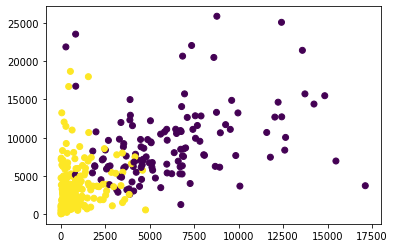

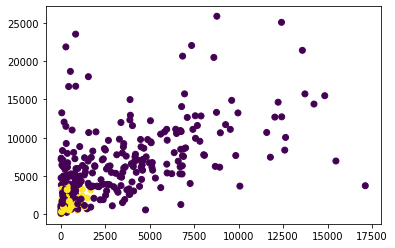

In [12]:
# Your code here:

# Define x and y
x = customers["Detergents_Paper"]
y = customers["Milk"]

# create plot 1
plt.scatter(x, y, c=customers["labels"])
plt.show()

# create plot 2
plt.scatter(x, y, c=customers["labels_DBSCAN"])
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

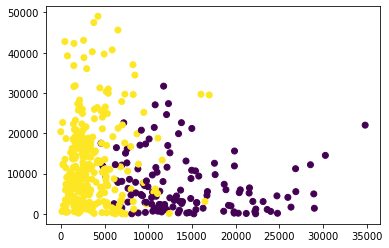

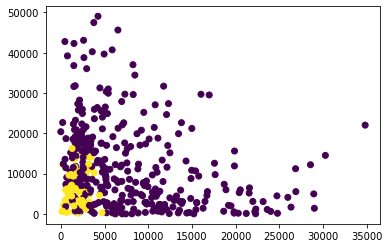

In [13]:
# Your code here:

# Define x and y
x = customers["Grocery"]
y = customers["Fresh"]

# create plot 1
plt.scatter(x, y, c=customers["labels"])
plt.show()

# create plot 2
plt.scatter(x, y, c=customers["labels_DBSCAN"])
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

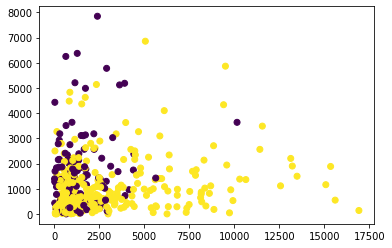

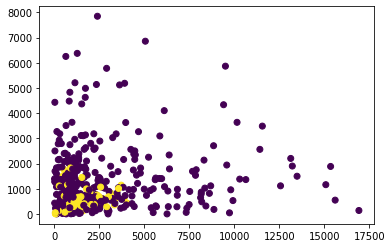

In [14]:
# Your code here:

# Define x and y
x = customers["Frozen"]
y = customers["Delicassen"]

# create plot 1
plt.scatter(x, y, c=customers["labels"])
plt.show()

# create plot 2
plt.scatter(x, y, c=customers["labels_DBSCAN"])
plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [26]:
# Your code here:

# mean per group
display(customers.groupby(["labels"]).agg("mean")

customers.groupby(["labels_DBSCAN"]).agg("mean")

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.379009,2.45481,11641.819242,5565.478134,7822.857143,2781.938776,2779.647230,1377.119534,0.629738
0,1.000000,3.00000,6218.647887,1521.352113,1940.478873,1428.915493,410.788732,565.563380,1.000000


Which algorithm appears to perform better?

In [25]:
# Your observations here

# DBSCAN seems to make the division between low and high values, which makes sense. 
# Therefore DBSCAN mightbe seen to perform better. 

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [17]:
# Your code here

In [18]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [19]:
# Your code here

In [20]:
# Your comment here